
# WWLayerIterator-VGG11

Example of the Stacked Option

- Stacks all weight matrices into a single, large, rectangular matrix

- Probably should normalize each layer in some consistent way *(not done yet)

###  not ready yet






In [1]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
import numpy as np
import pandas as pd

from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext watermark
%watermark

2021-09-10T16:48:47-07:00

CPython 3.8.5
IPython 7.18.1

compiler   : Clang 10.0.0 
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 12
interpreter: 64bit


### Import WeightWatcher

set custom Logging at WARN Level

In [3]:
import logging

import weightwatcher as ww
import torchvision.models as models

logger = logging.getLogger(ww.__name__)
logger.setLevel(logging.WARNING)

ww.__version__

'0.5.3'

###  How to create a WWLayerIterator

WWLayer 0  Stacked Layer PYTORCH STACKED  skipped False


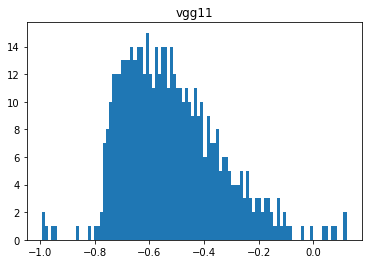

Assuming nested distributions


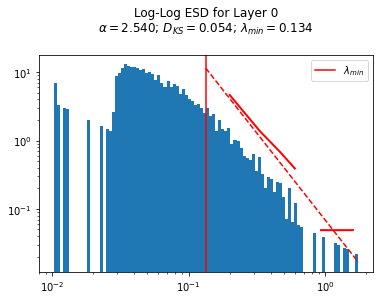

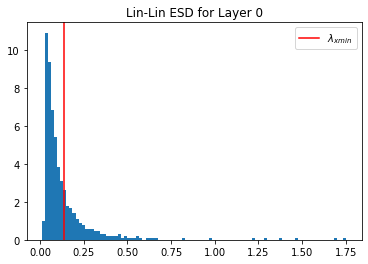

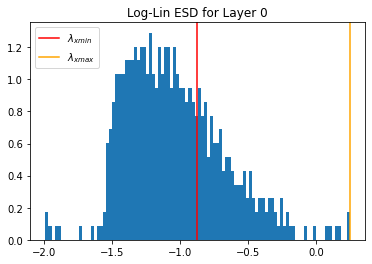

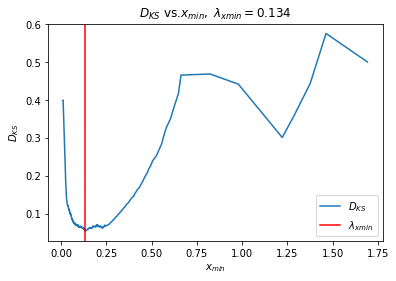

{'layer_id': 0, 'name': 'Stacked Layer', 'layer_type': 'LAYER_TYPE.STACKED', 'N': 29379, 'M': 25088, 'rf': 1, 'alpha': 2.540236274771532, 'xmin': 0.13368013501167297, 'xmax': 1.7544817924499512, 'D': 0.05361309932633229, 'sigma': 0.12452072253511554, 'num_pl_spikes': 153, 'best_fit': 'truncated_power_law', 'warning': '', 'norm': 72.44517, 'log_norm': 1.8600094, 'spectral_norm': 1.7544818, 'log_spectral_norm': 0.24414887, 'alpha_weighted': 0.6201958041864146, 'log_alpha_norm': 1.407174066539325, 'stable_rank': 41.29149, 'matrix_rank': 521, 'entropy': 0.9216214319596538}
WWLayer 0  Stacked Layer PYTORCH STACKED  skipped False


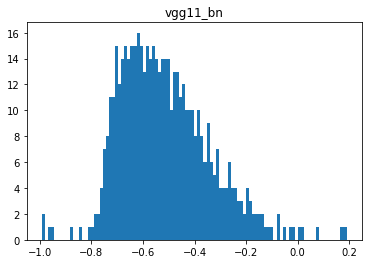

Assuming nested distributions


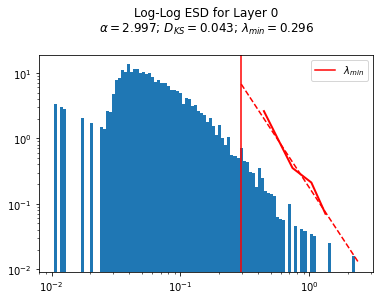

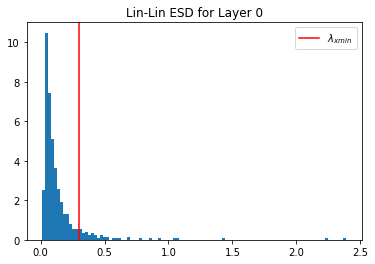

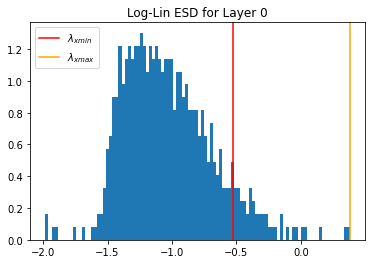

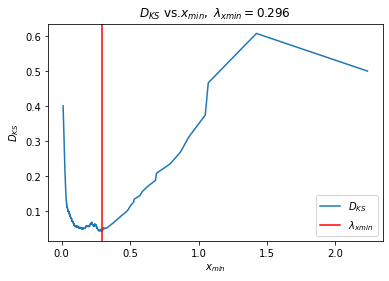

{'layer_id': 0, 'name': 'Stacked Layer', 'layer_type': 'LAYER_TYPE.STACKED', 'N': 29379, 'M': 25088, 'rf': 1, 'alpha': 2.996929738503124, 'xmin': 0.295783132314682, 'xmax': 2.3923122882843018, 'D': 0.04294558442131435, 'sigma': 0.2882319805193869, 'num_pl_spikes': 48, 'best_fit': 'truncated_power_law', 'warning': '', 'norm': 72.42351, 'log_norm': 1.8598796, 'spectral_norm': 2.3923123, 'log_spectral_norm': 0.37881786, 'alpha_weighted': 1.135290499056831, 'log_alpha_norm': 1.5627425384404119, 'stable_rank': 30.273434, 'matrix_rank': 520, 'entropy': 0.9223745499762713}
WWLayer 0  Stacked Layer PYTORCH STACKED  skipped False


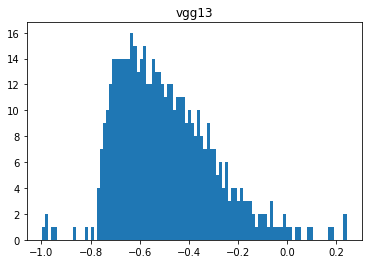

Assuming nested distributions


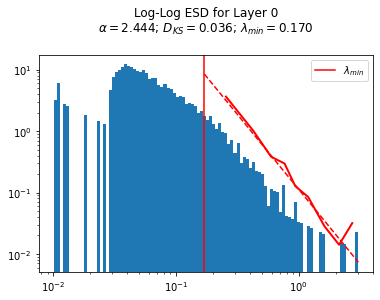

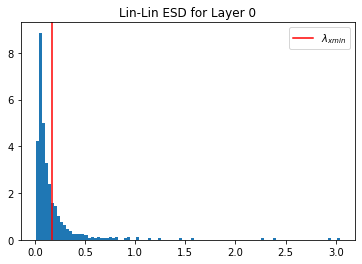

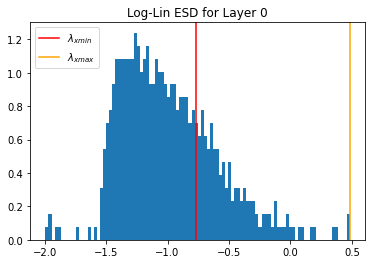

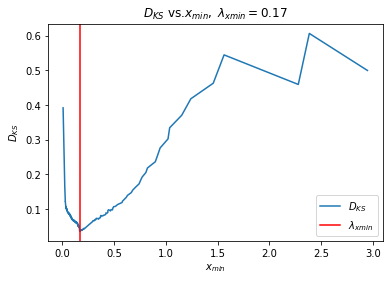

{'layer_id': 0, 'name': 'Stacked Layer', 'layer_type': 'LAYER_TYPE.STACKED', 'N': 31107, 'M': 25088, 'rf': 1, 'alpha': 2.4438811240823024, 'xmin': 0.16991961002349854, 'xmax': 3.0431301593780518, 'D': 0.03617837181074446, 'sigma': 0.12246839852204815, 'num_pl_spikes': 139, 'best_fit': 'truncated_power_law', 'warning': '', 'norm': 90.44655, 'log_norm': 1.956392, 'spectral_norm': 3.0431302, 'log_spectral_norm': 0.48332053, 'alpha_weighted': 1.1811779304843082, 'log_alpha_norm': 1.8498039033696414, 'stable_rank': 29.721552, 'matrix_rank': 521, 'entropy': 0.898773952037956}
WWLayer 0  Stacked Layer PYTORCH STACKED  skipped False


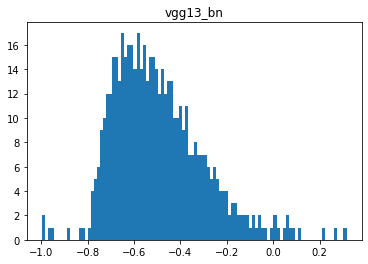

Assuming nested distributions


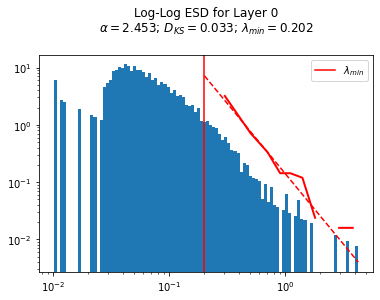

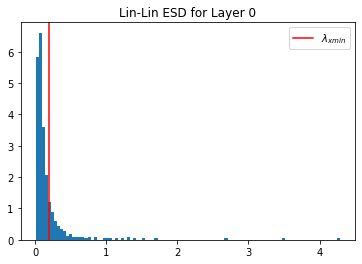

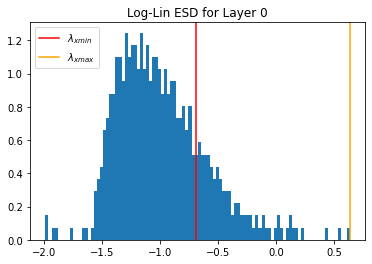

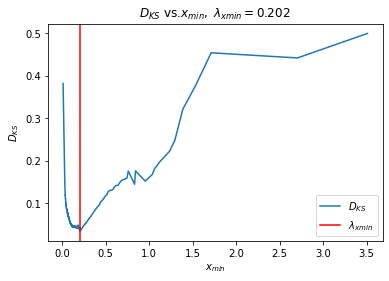

{'layer_id': 0, 'name': 'Stacked Layer', 'layer_type': 'LAYER_TYPE.STACKED', 'N': 31107, 'M': 25088, 'rf': 1, 'alpha': 2.4533776782439505, 'xmin': 0.20214147865772247, 'xmax': 4.289272308349609, 'D': 0.03349331910045161, 'sigma': 0.14251540657665537, 'num_pl_spikes': 104, 'best_fit': 'truncated_power_law', 'warning': '', 'norm': 90.42212, 'log_norm': 1.9562746, 'spectral_norm': 4.2892723, 'log_spectral_norm': 0.63238364, 'alpha_weighted': 1.5514759177011914, 'log_alpha_norm': 1.9961032985143328, 'stable_rank': 21.080994, 'matrix_rank': 520, 'entropy': 0.889553241228095}


<Figure size 432x288 with 0 Axes>

In [5]:
logger = logging.getLogger('weightwatcher') 
logger.setLevel(logging.WARNING)


DEFAULT_PARAMS = {'glorot_fix': False, 'normalize':False, 'conv2d_norm':True, 'randomize': True, 'savefig':False, 
                  'rescale':True , 'deltaEs':False, 'intra':False, 'channels':None, 'conv2d_fft':False, 
                  'ww2x':False, 'stacked':True, 'plot':True, 'savedir':"ww-img"}

params = DEFAULT_PARAMS


vgg11 = models.vgg11(pretrained=True)
vgg11_bn = models.vgg11_bn(pretrained=True)
vgg13 = models.vgg13(pretrained=True)
vgg13_bn = models.vgg13_bn(pretrained=True)

eig_max = {}
data = {}
for model, name in zip([vgg11, vgg11_bn, vgg13, vgg13_bn], 
                       ['vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn']):
    watcher = ww.WeightWatcher(model=model)

    ww_layer_iterator = watcher.make_layer_iterator(model=model,  params=params)

    for ww_layer in ww_layer_iterator:
        print(ww_layer)

    W = ww_layer.Wmats[0]
    from sklearn.decomposition import TruncatedSVD
    svd = TruncatedSVD(n_components=5000)
    svd.fit(W)
    svals = svd.singular_values_
    
    svals_tail = svals[svals > 0.1]
    evals_tail = svals_tail*svals_tail
    
    eig_max[name]=np.max(evals_tail)
    
    plt.hist(np.log10(svals_tail), bins=100);
    plt.title(name)
    plt.show()
    
    ww_layer.evals = evals_tail
    watcher.apply_fit_powerlaw(ww_layer, params=params)
    watcher.apply_norm_metrics(ww_layer, params=params)
    data[name]=ww_layer.get_row()
    print(data[name])

In [ ]:
alpha = [2.540, 2.444, 2.805, 3.008]
lambda_max = [1.75, 2.0, 3.0, 3.8]

In [ ]:
alpha_hat = np.array(alpha)*np.log10(np.array(lambda_max))

In [ ]:
alpha_hat